# Prediction of next possible data 
## for [ 110, 125, 133, 146, 158, 172, 187, 196, 210, ? ]

In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

## Preparing independent and dependent features

In [43]:
def prepare_data(timeseries_data,n_features):
    X,Y=[],[]
    for i in range(len(timeseries_data)):
        end_ix=i + n_features
        if end_ix > len(timeseries_data)-1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)



In [44]:
# Define input sequence
timeseries_data=[110, 125, 133, 146, 158, 172, 187, 196, 210]
    
# Chose the number of time steps
n_steps=3

# Split into samples

X,Y=prepare_data(timeseries_data, n_steps)


In [45]:
print(X), print(Y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [46]:
X.shape

(6, 3)

In [47]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [48]:
X.shape

(6, 3, 1)

## Building LSTM model

In [49]:
# define Model

model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(n_steps, n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Fit model

model.fit(X,Y, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 31054.1973
Epoch 2/300
1/1 [==============================] - 0s 14ms/step - loss: 29470.0762
Epoch 3/300
1/1 [==============================] - 0s 25ms/step - loss: 28250.7559
Epoch 4/300
1/1 [==============================] - 0s 22ms/step - loss: 26797.5410
Epoch 5/300
1/1 [==============================] - 0s 43ms/step - loss: 25251.5840
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 23934.3027
Epoch 7/300
1/1 [==============================] - 0s 17ms/step - loss: 22905.0879
Epoch 8/300
1/1 [==============================] - 0s 17ms/step - loss: 22055.7734
Epoch 9/300
1/1 [==============================] - 0s 17ms/step - loss: 21267.3535
Epoch 10/300
1/1 [==============================] - 0s 22ms/step - loss: 20447.7461
Epoch 11/300
1/1 [==============================] - 0s 12ms/step - loss: 19489.2656
Epoch 12/300
1/1 [==============================] - 0s 10ms/step - loss: 18334.0547
Epo

1/1 [==============================] - 0s 22ms/step - loss: 4.2179
Epoch 202/300
1/1 [==============================] - 0s 17ms/step - loss: 4.2059
Epoch 203/300
1/1 [==============================] - 0s 19ms/step - loss: 4.1908
Epoch 204/300
1/1 [==============================] - 0s 14ms/step - loss: 4.1761
Epoch 205/300
1/1 [==============================] - 0s 16ms/step - loss: 4.1617
Epoch 206/300
1/1 [==============================] - 0s 19ms/step - loss: 4.1447
Epoch 207/300
1/1 [==============================] - 0s 18ms/step - loss: 4.1300
Epoch 208/300
1/1 [==============================] - 0s 29ms/step - loss: 4.1141
Epoch 209/300
1/1 [==============================] - 0s 19ms/step - loss: 4.0961
Epoch 210/300
1/1 [==============================] - 0s 15ms/step - loss: 4.0790
Epoch 211/300
1/1 [==============================] - 0s 17ms/step - loss: 4.0625
Epoch 212/300
1/1 [==============================] - 0s 22ms/step - loss: 4.0479
Epoch 213/300
1/1 [=======================

In [50]:
x = [187, 196, 210]
x=np.asarray(x)
print(x)
temp_input=list(x)
print(temp_input)

[187 196 210]
[187, 196, 210]


In [52]:
# demonstrate prediction for next 10 days

x_input = [187, 196, 210]
x_input=np.asarray(x_input)

temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.asarray(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[224.1107]
1 day input [196.         210.         224.11070251]
1 day output [[236.33908]]
2 day input [210.         224.11070251 236.33908081]
2 day output [[250.45439]]
3 day input [224.1107  236.33908 250.45439]
3 day output [[265.02197]]
4 day input [236.33908 250.45439 265.02197]
4 day output [[279.30734]]
5 day input [250.45439 265.02197 279.30734]
5 day output [[294.8215]]
6 day input [265.02197 279.30734 294.8215 ]
6 day output [[310.9246]]
7 day input [279.30734 294.8215  310.9246 ]
7 day output [[327.4479]]
8 day input [294.8215 310.9246 327.4479]
8 day output [[345.05713]]
9 day input [310.9246  327.4479  345.05713]
9 day output [[363.4402]]
[224.1107, 236.33908, 250.45439, 265.02197, 279.30734, 294.8215, 310.9246, 327.4479, 345.05713, 363.4402]


In [53]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [54]:
len(timeseries_data)

9

In [55]:
lst_output

[224.1107,
 236.33908,
 250.45439,
 265.02197,
 279.30734,
 294.8215,
 310.9246,
 327.4479,
 345.05713,
 363.4402]

In [59]:
lst=[170, 180, 190]
print(lst)

[170, 180, 190]


## Visualizaing the output

Time series data [110, 125, 133, 146, 158, 172, 187, 196, 210]
lst_output [224.1107, 236.33908, 250.45439, 265.02197, 279.30734, 294.8215, 310.9246, 327.4479, 345.05713, 363.4402]


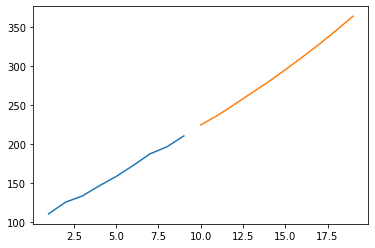

In [70]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)
print("Time series data",timeseries_data)
print("lst_output",lst_output)
